In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass as ec
import tools
import math_functions as mf
import BodeClass as bc_ECS
import BodeClass_PSI as bc_PSI
import DREAM_colors as dc


In [3]:
importlib.reload(ec)
importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc_ECS)
importlib.reload(bc_PSI)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [4]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/20230926_IBPC_ENS_Ladi/"

ECS = pd.read_csv(folder + "bode_ECS_data.csv")
PSI = pd.read_csv(folder + "bode_PSI_data.csv")

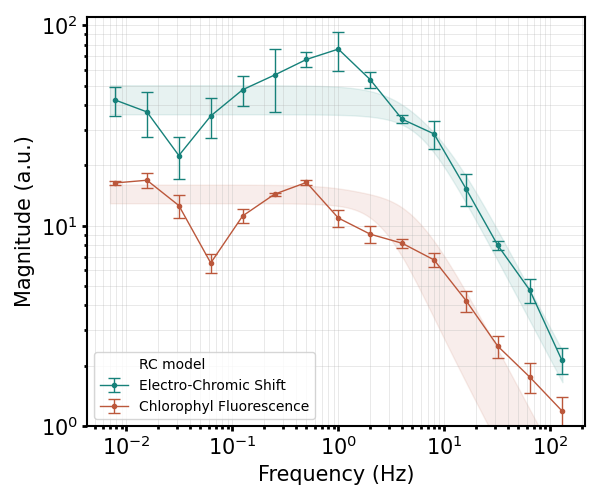

In [14]:
marker = 3
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]

fig, ax = plt.subplots(figsize=(6,5))
#fig.suptitle("Comparioson of ECS and fluorescence", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude, fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS.Std, capsize=4, label = "Electro-Chromic Shift")
ax = tools.plot_model(ax, "RC",ECS.Frequency, ECS.Amplitude, sigma = ECS.Std, color = green, label = True, line = 0, alpha = 0.1)
ax = tools.plot_model(ax, "RC",PSI.Frequency, PSI.Amplitude, sigma = PSI.Std, color = orange, label = False, line = 0, alpha = 0.1)
ax.errorbar(PSI.Frequency, PSI.Amplitude, fmt = format, markersize = marker, linewidth = 1, color = orange, yerr=PSI.Std, capsize=4, label = "Chlorophyl Fluorescence")

ax = tools.bode_plot_axes(ax)
ax.set_ylim(1e0, 1.1e2)

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO.png", dpi=400)

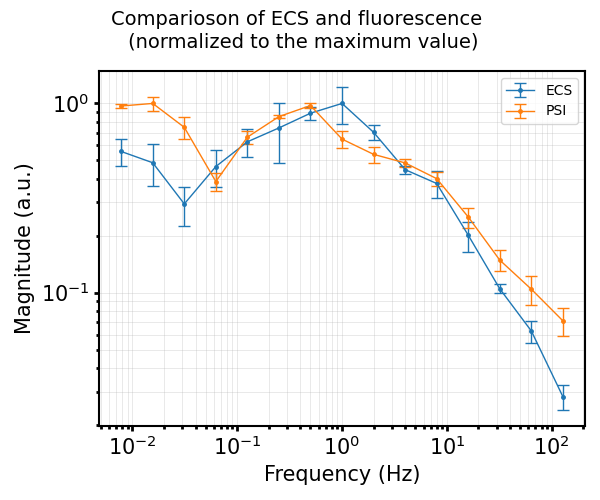

In [6]:
marker = 2.5

fig, ax = plt.subplots(figsize=(6,5))
fig.suptitle("Comparioson of ECS and fluorescence \n (normalized to the maximum value)", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude/ECS.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=ECS.Std/ECS.Amplitude.max(), capsize=4, label = "ECS")
ax.errorbar(PSI.Frequency, PSI.Amplitude/PSI.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=PSI.Std/PSI.Amplitude.max(), capsize=4, label = "PSI")

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO_norm.png", dpi=300)